Jakov Rukavina

# Projekt

Implementacija članka "Implementation of Machine Learning Model to Predict Heart Failure Disease" u sklopu projekta na predmetu Uvod u znanost o podacima.

Članak je dostupan na linku: https://pdfs.semanticscholar.org/a74f/d8c51251e8c6126a1527e545bd78860a10f9.pdf


## Vrsta istraživanja u članku

Istraživanje možemo klasificirati prema:
 - svrsi: Primijenjeno istraživanje - u članku se koriste već postojeće i dobro poznate metode kako bi se poboljšali rezultati prijašnjih istraživanja na ovu temu
 - dubini: Istraživačko (exploratory) istraživanje - članak se fokusira na obradu javno dostupnih medicinskih podataka kako bi se objasnila veza između određenih značajki (koje opisuju stanje pacijenta) te zatajenja srca
 - vrsti korištenih podataka: kvantitativno istraživanje - većina podataka u korištenom skupu dobivena su medicinskim mjerenjima
 - stupnju manipulacije varijablama: promatračko istraživanje - varijable se ne mijenjaju već se koriste one koje su dobivene mjerenjem (promatranjem)
 - vrsti zaključka: induktivno istraživanje - znanje se generira promatranjem radi postizanja generalizacije
 - vremenu provedbe: studija presjeka - promatraju se trenutna stanja skupine pacijenata
 - izvoru informacija: sekundarno istraživanje - istraživači nisu sami prikupili podatke već su koristi javno dostupan skup
 - načinu prikupljanja podataka: laboratorijsko istraživanje - uspostavlja se odnos zatajenja bolesti srca i drugih značajki


## Importi biblioteka

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

## Podaci

### Pregled podataka



Skup podataka korišten u članku sastoji se od 13 značajki i jedne oznake. Ukupno sadrži 303 opservacije odnosno očitanja stanja pacijenata te je dostupan na https://www.kaggle.com/ronitf/heart-disease-uci.

Orginalni skup podataka sadrži 76 značajki no iz njega su izbačeni razni podaci poput onih privatnih (ime pacijenta itd.). 

Opis značajki u skupu podataka:
    
 - age: The person’s age in years
 - sex: The person’s sex (1 = male, 0 = female)
 - cp: chest pain type
        — Value 0: asymptomatic
        — Value 1: atypical angina
        — Value 2: non-anginal pain
        — Value 3: typical angina
 - trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
 - chol: The person’s cholesterol measurement in mg/dl
 - fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
 - restecg: resting electrocardiographic results
        — Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
        — Value 1: normal
        — Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - thalach: The person’s maximum heart rate achieved
 - exang: Exercise induced angina (1 = yes; 0 = no)
 - oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)
 - slope: the slope of the peak exercise ST segment
        — Value 0: downsloping
        — Value 1: flat
        — Value 2: upsloping
 - ca: The number of major vessels (0–3)
 - thal: A blood disorder called thalassemia
        — Value 0: NULL (dropped from the dataset previously
        — Value 1: fixed defect (no blood flow in some part of the heart)
        — Value 2: normal blood flow
        — Value 3: reversible defect (a blood flow is observed but it is not normal)
 - target: Heart disease (1 = yes, 0 = no)

Učitavanje .csv filea

In [436]:
file = 'data/heart_cleveland.csv'
# file = 'data/heart.csv'
df = pd.read_csv(file)


Prvi pregled podataka

In [437]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Pregled kategoričkih podataka.

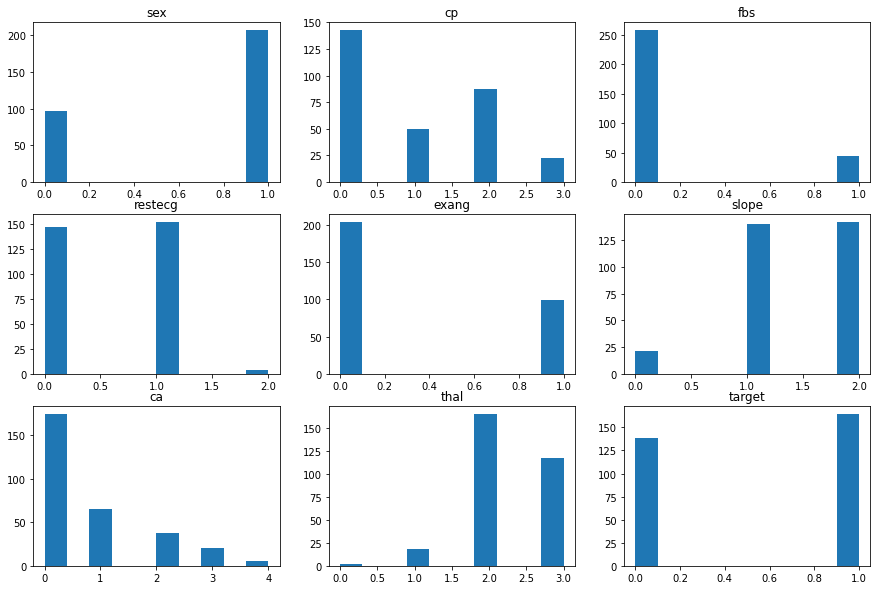

In [438]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

ax[0, 0].hist(df.sex)
ax[0, 0].title.set_text('sex')

ax[0, 1].hist(df.cp)
ax[0, 1].title.set_text('cp')

ax[0, 2].hist(df.fbs)
ax[0, 2].title.set_text('fbs')

ax[1, 0].hist(df.restecg)
ax[1, 0].title.set_text('restecg')

ax[1, 1].hist(df.exang)
ax[1, 1].title.set_text('exang')

ax[1, 2].hist(df.slope)
ax[1, 2].title.set_text('slope')

ax[2, 0].hist(df.ca)
ax[2, 0].title.set_text('ca')

ax[2, 1].hist(df.thal)
ax[2, 1].title.set_text('thal')

ax[2, 2].hist(df.target)
ax[2, 2].title.set_text('target')

plt.show()

In [439]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Outliers - stršeći podaci

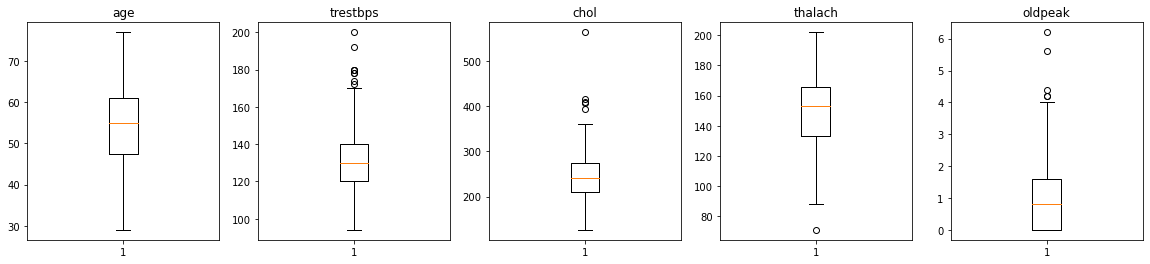

In [441]:
fig, ax = plt.subplots(1, 5, figsize=(20,4))

ax[0].boxplot(df.age)
ax[0].title.set_text('age')

ax[1].boxplot(df.trestbps)
ax[1].title.set_text('trestbps')

ax[2].boxplot(df.chol)
ax[2].title.set_text('chol')

ax[3].boxplot(df.thalach)
ax[3].title.set_text('thalach')

ax[4].boxplot(df.oldpeak)
ax[4].title.set_text('oldpeak')

plt.show()

In [442]:
print(df.loc[df.oldpeak > 5]['oldpeak'].count())
print(df.loc[df.chol > 500]['chol'].count())


2
1


Izbacivanje stršećih podataka

In [443]:
print(len(df))

df = df.loc[df.chol <= 500]
df = df.loc[df.oldpeak <= 5]

print(len(df))

303
300


Izbacivanje duplikata

In [444]:
print(len(df))

df.drop_duplicates(inplace=True)

print(len(df))

300
299


### Važnost pojedinih značajki

<AxesSubplot:>

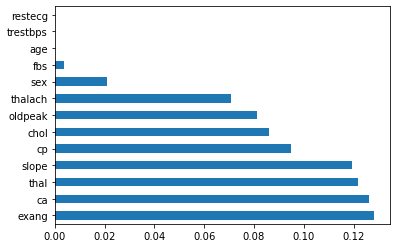

In [445]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = df.filter(regex='^(?!target$).*')
y = df['target']

kbest = SelectKBest(mutual_info_classif, k=13)
kbest.fit(X, y)

feat_importances = pd.Series(kbest.scores_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')


Vizualizacija utjecaja najbitnijih značajki na zatajenje srca.

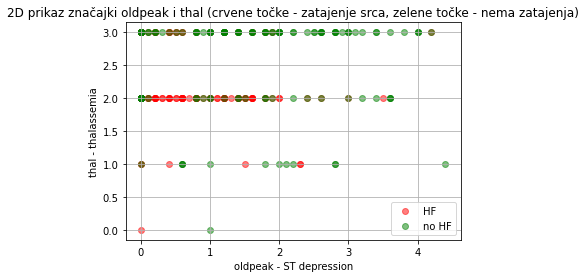

In [446]:
# mask
mask_hf = df.target == 1

# plot
plt.scatter(df.loc[mask_hf,'oldpeak'], df.loc[mask_hf,'thal'], alpha=0.5, c='r', label='HF')
plt.scatter(df.loc[~mask_hf,'oldpeak'], df.loc[~mask_hf,'thal'], alpha=0.5, c='g', label='no HF')
plt.xlabel('oldpeak - ST depression')
plt.ylabel('thal - thalassemia')
plt.title('2D prikaz značajki oldpeak i thal (crvene točke - zatajenje srca, zelene točke - nema zatajenja)')
plt.grid()
plt.legend(loc='best')
plt.show()

Još jedan par zanimljivih značajki

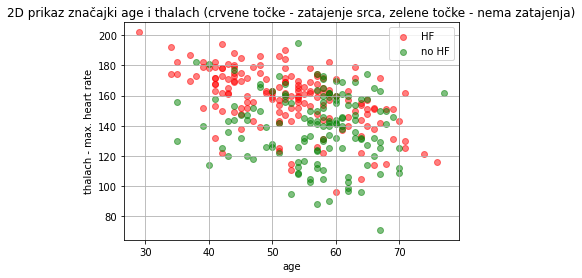

In [447]:
# mask
mask_hf = df.target == 1

# plot
plt.scatter(df.loc[mask_hf,'age'], df.loc[mask_hf,'thalach'], alpha=0.5, c='r', label='HF')
plt.scatter(df.loc[~mask_hf,'age'], df.loc[~mask_hf,'thalach'], alpha=0.5, c='g', label='no HF')
plt.xlabel('age')
plt.ylabel('thalach - max. heart rate')
plt.title('2D prikaz značajki age i thalach (crvene točke - zatajenje srca, zelene točke - nema zatajenja)')
plt.grid()
plt.legend(loc='best')
plt.show()

### Korelacija značajki

Iz grafa se vidi da nema značajki koje su u visokoj korelacije stoga ne treba izbacivati značajke po ovoj osnovi.

<AxesSubplot:>

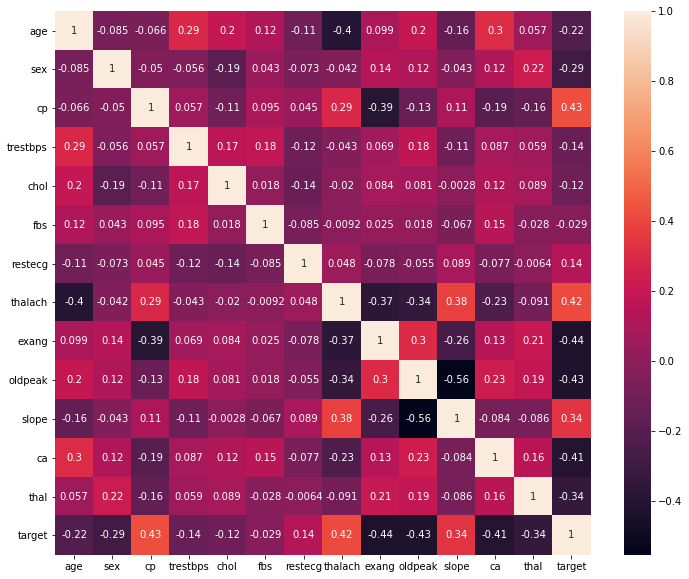

In [448]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

### Stvaranje sintetičkih podataka

In [449]:
#from sklearn.neighbors import KernelDensity
#kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(df)
#synthetic = pd.DataFrame(kde.sample(samples))


def synthesize_data(samples: int, exisitngData: pd.DataFrame):
    
    new = []
    
    for i in range(samples):
        
        original = exisitngData.iloc[random.randint(0, len(exisitngData) - 1)].copy()
        #print(original)
        original['age'] += random.gauss(mu=0.0, sigma=(original['age'] / 50))
        original['trestbps'] += random.gauss(mu=0.0, sigma=(original['trestbps'] / 50))
        original['chol'] += random.gauss(mu=0.0, sigma=(original['chol'] / 50))
        original['thalach'] += random.gauss(mu=0.0, sigma=(original['thalach'] / 50))
        original['oldpeak'] += random.gauss(mu=0.0, sigma=(original['oldpeak'] / 50))
        #print(original)
        new.append(original)
    
    new = pd.DataFrame(new)
    
    new.age = np.round(new.age).astype(int) 
    new.sex = np.round(new.sex).astype(int) 
    new.cp = np.round(new.cp).astype(int) 
    new.trestbps = np.round(new.trestbps).astype(int) 
    new.chol = np.round(new.chol).astype(int) 
    new.fbs = np.round(new.fbs).astype(int) 
    new.restecg = np.round(new.restecg).astype(int) 
    new.thalach = np.round(new.thalach).astype(int) 
    new.exang = np.round(new.exang).astype(int) 
    new.oldpeak = np.round(new.oldpeak, 1)
    new.slope = np.round(new.slope).astype(int) 
    new.ca = np.round(new.ca).astype(int) 
    new.thal = np.round(new.thal).astype(int) 
    new.target = np.round(new.target).astype(int) 
    
    #new.drop(columns=['Id'])
    return new

        
ndf = synthesize_data(1000, df)
df = pd.merge(ndf, df, how='outer')


Ponovo izbacivanje duplikata za svaki slučaj

In [450]:
print(len(df))

df.drop_duplicates(inplace=True)

print(len(df))

1297
1297


### Pretvorba kategoričkih značajki u binarne

Kategorije značajki 'cp', 'restecg', 'slope' i 'thal' nemaju poredak pa ih pretvaramo u binarne uz one-hot encoding.

In [451]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


### Odvajanje i skaliranje podataka

In [452]:
X = df.filter(regex='^(?!target$).*')
y = df['target']

In [453]:
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,61,1,142,187,0,145,1,3.9,2,1,...,1,0,0,0,0,1,0,0,0,1
1,65,0,152,230,0,115,0,1.0,3,1,...,1,0,0,0,1,0,0,0,0,1
2,66,1,135,288,1,177,0,1.4,1,0,...,1,0,0,0,1,0,0,0,1,0
3,42,1,149,242,0,178,0,0.8,2,0,...,1,0,0,0,0,1,0,0,1,0
4,59,1,148,203,0,164,0,0.0,1,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,57,0,140,241,0,123,1,0.2,0,1,...,0,1,0,0,1,0,0,0,0,1
1293,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,1,0,0,0,0,1
1294,68,1,144,193,1,141,0,3.4,2,1,...,0,1,0,0,1,0,0,0,0,1
1295,57,1,130,131,0,115,1,1.2,1,1,...,0,1,0,0,1,0,0,0,0,1


In [454]:
y = y.to_numpy()

Skaliranje i odvajanje na skup za treniranje i testiranje.

In [455]:
from sklearn import preprocessing, model_selection

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.746481,0.690812,0.662348,-1.214055,-0.396236,-0.232453,1.417491,2.663242,1.326260,1.024194,...,1.025775,-0.996152,-0.12193,-0.266488,-0.930692,1.062883,-0.07878,-0.254677,-1.158083,1.333155
1,1.191163,-1.447572,1.238593,-0.344641,-0.396236,-1.540824,-0.705472,-0.009165,2.344106,1.024194,...,1.025775,-0.996152,-0.12193,-0.266488,1.074470,-0.940837,-0.07878,-0.254677,-1.158083,1.333155
2,1.302334,0.690812,0.258977,0.828056,2.523751,1.163141,-0.705472,0.359443,0.308414,-0.976378,...,1.025775,-0.996152,-0.12193,-0.266488,1.074470,-0.940837,-0.07878,-0.254677,0.863496,-0.750100
3,-1.365762,0.690812,1.065720,-0.102014,-0.396236,1.206754,-0.705472,-0.193469,1.326260,-0.976378,...,1.025775,-0.996152,-0.12193,-0.266488,-0.930692,1.062883,-0.07878,-0.254677,0.863496,-0.750100
4,0.524139,0.690812,1.008095,-0.890552,-0.396236,0.596181,-0.705472,-0.930685,0.308414,1.024194,...,-0.974872,1.003863,-0.12193,-0.266488,-0.930692,1.062883,-0.07878,-0.254677,-1.158083,1.333155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,0.301798,-1.447572,0.547099,-0.122233,-0.396236,-1.191925,1.417491,-0.746381,-0.709431,1.024194,...,-0.974872,1.003863,-0.12193,-0.266488,1.074470,-0.940837,-0.07878,-0.254677,-1.158083,1.333155
1293,-1.032250,0.690812,-1.181635,0.342802,-0.396236,-0.799414,-0.705472,0.175139,-0.709431,-0.976378,...,-0.974872,1.003863,-0.12193,-0.266488,1.074470,-0.940837,-0.07878,-0.254677,-1.158083,1.333155
1294,1.524675,0.690812,0.777597,-1.092741,2.523751,-0.406903,-0.705472,2.202482,1.326260,1.024194,...,-0.974872,1.003863,-0.12193,-0.266488,1.074470,-0.940837,-0.07878,-0.254677,-1.158083,1.333155
1295,0.301798,0.690812,-0.029145,-2.346314,-0.396236,-1.540824,1.417491,0.175139,0.308414,1.024194,...,-0.974872,1.003863,-0.12193,-0.266488,1.074470,-0.940837,-0.07878,-0.254677,-1.158083,1.333155


Selekcija značajki nije dala mjerljivo povećanje točnosti ili smanjenje vremena izvedbe pa taj kod ostaje zakomentiran.

In [456]:
#kbest = SelectKBest(mutual_info_classif, k=15)
#kbest.fit(X_train, y_train)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

#X_train_ = X_train[X_train.columns[kbest.get_support()]]
#X_test_ = X_test[X_test.columns[kbest.get_support()]]

## Učenje i predikcija

Funkcija za evaluaciju modela.

In [457]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def show_metrics(y_true, y_pred):
    print('Accuracy: {:.2f}%\n'.format(accuracy_score(y_true, y_pred) * 100))
    print(classification_report(y_true, y_pred))
    
    #sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', ax=ax);
    
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');  
    ax.xaxis.set_ticklabels(['no HD', 'HD']);
    ax.yaxis.set_ticklabels(['no HD', 'HD']);
    

Funkcija za k-fold evaluaciju.

In [458]:
from sklearn.model_selection import KFold

def kfold_eval(model, X, y, k=10):
    
    kf = KFold(n_splits=k, shuffle=True)
 
    acc_score = []
 
    for train_index, test_index in kf.split(X):
        X_train , X_test = X[train_index], X[test_index]
        y_train , y_test = y[train_index], y[test_index]
     
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
     
        acc = accuracy_score(y_test, y_pred)
        acc_score.append(acc)
     
    avg_acc_score = sum(acc_score)/k
 
    # print('accuracy of each fold - {}'.format(acc_score))
    print('{}-fold avg accuracy: {:.2f}%'.format(k, avg_acc_score * 100))

### Stabla odluke

10-fold avg accuracy: 96.30%
Accuracy: 96.41%

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       165
           1       0.96      0.97      0.97       225

    accuracy                           0.96       390
   macro avg       0.96      0.96      0.96       390
weighted avg       0.96      0.96      0.96       390



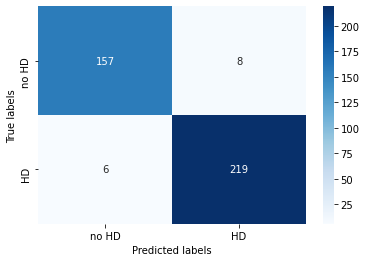

In [459]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

kfold_eval(tree_model, X_scaled, y)
show_metrics(y_test, y_pred)

### Naivni Bayes

10-fold avg accuracy: 84.65%
Accuracy: 87.95%

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       165
           1       0.91      0.88      0.89       225

    accuracy                           0.88       390
   macro avg       0.88      0.88      0.88       390
weighted avg       0.88      0.88      0.88       390



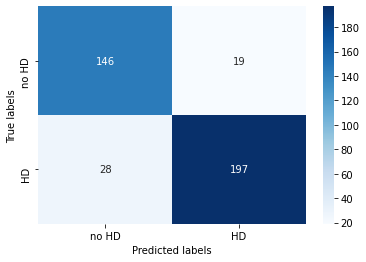

In [460]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

kfold_eval(nb_model, X_scaled, y)
show_metrics(y_test, y_pred)

### Random Forest

10-fold avg accuracy: 99.15%
Accuracy: 98.97%

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       165
           1       0.99      1.00      0.99       225

    accuracy                           0.99       390
   macro avg       0.99      0.99      0.99       390
weighted avg       0.99      0.99      0.99       390



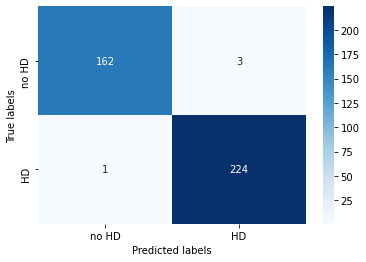

In [461]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

kfold_eval(rf_model, X_scaled, y)
show_metrics(y_test, y_pred)

### Logistička regresija

10-fold avg accuracy: 85.96%
Accuracy: 87.44%

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       165
           1       0.92      0.86      0.89       225

    accuracy                           0.87       390
   macro avg       0.87      0.88      0.87       390
weighted avg       0.88      0.87      0.87       390



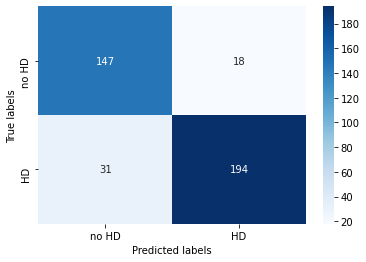

In [462]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

kfold_eval(lr_model, X_scaled, y)
show_metrics(y_test, y_pred)

### SVM

10-fold avg accuracy: 93.29%
Accuracy: 93.59%

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       165
           1       0.96      0.92      0.94       225

    accuracy                           0.94       390
   macro avg       0.93      0.94      0.93       390
weighted avg       0.94      0.94      0.94       390



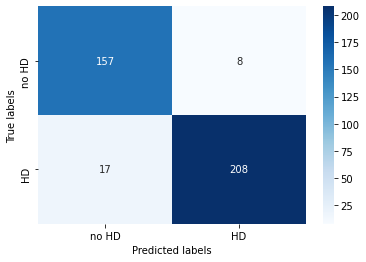

In [463]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

kfold_eval(svm_model, X_scaled, y)
show_metrics(y_test, y_pred)